## Análise e interpretação dos dados fornecidos para o projeto final

### Importando bibliotecas que serão usadas

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

### Leitura e visualização dos datasets

In [21]:
df1 = pd.read_csv('../data/estaticos_portfolio1.csv',index_col = 0)
df2 = pd.read_csv('../data/estaticos_portfolio2.csv',index_col = 0)
df3 = pd.read_csv('../data/estaticos_portfolio3.csv',index_col = 0)
mkt = pd.read_csv('../data/estaticos_market.csv',index_col = 0)
df2 = pd.merge(df2,mkt, on='id', how='inner')
df3 = pd.merge(df3,mkt, on='id', how='inner')

In [22]:
## numero de entradas
mkt.shape

(462298, 181)

In [23]:
## corpo do dataset
mkt.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Verificando o número de registros faltantes em cada feature

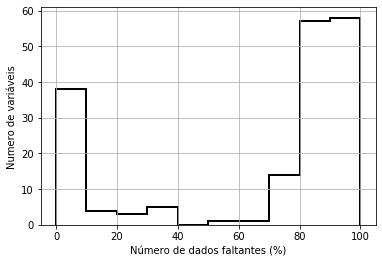

In [24]:
plt.hist(100*(mkt.isnull().sum(axis=0))/mkt.shape[0],bins = 10,histtype='step',color = 'black',linewidth = 2.)
plt.xlabel('Número de dados faltantes (%)')
plt.ylabel('Numero de variáveis')
plt.grid()

### Como primeiro passo, eliminarei as variáveis com 70% dos dados faltantes (não faz sentido trabalhar com um parâmetro que quase não possui estatística). Coloquei a porcentagem de corte como ajustável, logo podemos aumentar ou diminuir esse threshold.

In [25]:
threshold = 0.7   ## pegar colunas maior que 95%
nan_num   = (mkt.isnull().sum(axis = 0))/mkt.shape[0]  ## calculo da porcentagem de registros null para cada coluna
var_nans  = mkt.columns[nan_num>=threshold] ## pega nome das colunas maiores que a porcentagem definida
print('Variaveis que serão removidas total:'+str(var_nans.shape[0])+'\n ',var_nans)

Variaveis que serão removidas total:129
  Index(['vl_total_tancagem', 'vl_total_veiculos_antt',
       'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art',
       'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo',
       'vl_potenc_cons_oleo_gas', 'de_indicador_telefone', 'vl_frota',
       ...
       'min_meses_servicos_all', 'media_meses_servicos', 'max_meses_servicos',
       'min_meses_servicos', 'qt_funcionarios', 'qt_funcionarios_12meses',
       'qt_funcionarios_24meses', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'tx_rotatividade'],
      dtype='object', length=129)


### Removendo váriaveis 

In [26]:
mkt.drop(labels=var_nans,axis=1,inplace=True)    

In [27]:
## Database com features removidas
mkt.shape

(462298, 52)

### Analise dos registros faltantes

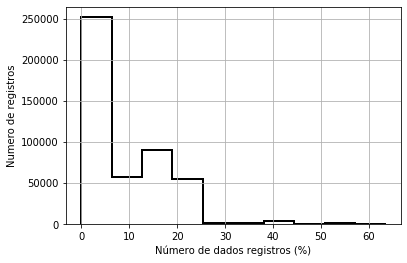

In [35]:
plt.hist(100*mkt.isnull().sum(axis=1)/mkt.shape[1],bins = 10,histtype='step',color = 'black',linewidth = 2.)
plt.xlabel('Número de dados registros (%)')
plt.ylabel('Numero de registros')
plt.grid()

#### Não é necessário remover registros

### Análise exploratória com as features escolhidas

In [37]:
keys_chosen = ['id',
'fl_matriz',
'de_natureza_juridica',
'sg_uf',
'nm_meso_regiao',
'de_ramo',
'setor',
'idade_empresa_anos',
'idade_emp_cat',
'fl_st_especial',
'fl_rm',
'de_saude_tributaria',
'de_nivel_atividade']

In [47]:
df1_filt = df1[keys_chosen]
df2_filt = df2[keys_chosen]
df3_filt = df3[keys_chosen]
mkt_filt = mkt[keys_chosen]

#### Começarei a análise por df1 e df2 visto que não possuem clientes em comum

In [48]:
mkt_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Data columns (total 13 columns):
id                      462298 non-null object
fl_matriz               462298 non-null bool
de_natureza_juridica    462298 non-null object
sg_uf                   462298 non-null object
nm_meso_regiao          403600 non-null object
de_ramo                 462298 non-null object
setor                   460371 non-null object
idade_empresa_anos      462298 non-null float64
idade_emp_cat           462298 non-null object
fl_st_especial          462298 non-null bool
fl_rm                   462298 non-null object
de_saude_tributaria     447447 non-null object
de_nivel_atividade      451130 non-null object
dtypes: bool(2), float64(1), object(10)
memory usage: 43.2+ MB


In [49]:
df1_filt.describe()

,idade_empresa_anos
count,555.000000
mean,10.139247
std,9.641625
min,0.052055
25%,2.924658
50%,6.709589
75%,15.494521
max,47.517808


In [50]:
df2_filt.describe()

,idade_empresa_anos
count,566.000000
mean,26.987691
std,11.638360
min,10.038356
25%,17.832192
50%,23.402740
75%,38.628082
max,55.126027


#### Só temos uma variável numérica. Vamos ver se conseguimos diferencias os clientes por ela

In [81]:
## rotulando os dados
df1_filt['target'] = np.ones(df1_filt.shape[0]).astype(np.int)
df2_filt['target'] = 2*np.ones(df2_filt.shape[0]).astype(np.int)
df3_filt['target'] = 3*np.ones(df3_filt.shape[0]).astype(np.int)

/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [83]:
pd.merge()

,id,fl_matriz,de_natureza_juridica,sg_uf,nm_meso_regiao,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_st_especial,fl_rm,de_saude_tributaria,de_nivel_atividade,target
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...,True,MUNICIPIO,MA,OESTE MARANHENSE,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.813699,> 20,False,NAO,VERDE,ALTA,3
1,16843c9ffb920170477118933798510d8d5f00f5c56c12...,True,SOCIEDADE SIMPLES LIMITADA,PI,NORTE PIAUIENSE,SERVICOS DE EDUCACAO,SERVIÇO,16.389041,15 a 20,False,NAO,VERDE,ALTA,3
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...,True,ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU D...,AM,CENTRO AMAZONENSE,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,40.380822,> 20,False,SIM,AZUL,ALTA,3
3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,True,MUNICIPIO,PI,CENTRO NORTE PIAUIENSE,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.854795,> 20,False,SIM,AZUL,ALTA,3
4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,True,MUNICIPIO,RN,AGRESTE POTIGUAR,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.865753,> 20,False,NAO,AZUL,ALTA,3
